In [2]:
print ("Developed by -")
v=u'\u0936\u0941\u092D\u092E\u0020\u0918\u094B\u0937'
print(v)

Developed by -
शुभम घोष


In [4]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 217.9 kB/s eta 0:00:07
    --------------------------------------- 0.0/1.4 MB 217.9 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.4 MB 403.5 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 403.5 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 327.2 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.4 MB 327.2 kB/s eta 0:00:05
   ---- ----------------------------------- 0.2/1.4 MB 436.9 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 429.5 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 474.7 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 474.7 kB/s eta 0:00:03
   -------- -

In [6]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import networkx as nx

In [8]:
file_path = "Market_Basket_Optimisation.csv"
dataset = pd.read_csv(file_path, header=None)

In [46]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
2,chutney,,,,,,,,,,,,,,,,,,,
3,turkey,avocado,,,,,,,,,,,,,,,,,,
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,,,,,,,,,,,,,,,,,
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,,,,,,,,,,,,,,
7498,chicken,,,,,,,,,,,,,,,,,,,
7499,escalope,green tea,,,,,,,,,,,,,,,,,,


In [10]:
# Data Preprocessing: Replace NaN values and convert to list of transactions
dataset.fillna('', inplace=True)
transactions = []
for i in range(0, len(dataset)):
    transaction = [str(item) for item in dataset.iloc[i] if item != '']
    transactions.append(transaction)

In [12]:
# Convert transactions into one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [16]:
# Define the function to get association rules with given support, confidence, and lift
def get_rules(min_support, min_confidence, min_lift):
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    # Filter rules by lift
    rules = rules[rules['lift'] >= min_lift]
    return rules

# Initialize the list to store results
results = []

# Try different values for support, confidence, and lift
support_values = [0.01, 0.02, 0.03, 0.04]
confidence_values = [0.2, 0.3, 0.4, 0.5]
lift_values = [1.0, 1.5, 2.0]

for support in support_values:
    for confidence in confidence_values:
        for lift in lift_values:
            rules = get_rules(support, confidence, lift)
            results.append({
                'support': support,
                'confidence': confidence,
                'lift': lift,
                'num_rules': len(rules)
            })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# You can then select the optimal combination based on the number of rules generated.

    support  confidence  lift  num_rules
0      0.01         0.2   1.0        160
1      0.01         0.2   1.5         96
2      0.01         0.2   2.0         23
3      0.01         0.3   1.0         63
4      0.01         0.3   1.5         48
5      0.01         0.3   2.0          9
6      0.01         0.4   1.0         18
7      0.01         0.4   1.5         18
8      0.01         0.4   2.0          3
9      0.01         0.5   1.0          2
10     0.01         0.5   1.5          2
11     0.01         0.5   2.0          2
12     0.02         0.2   1.0         54
13     0.02         0.2   1.5         21
14     0.02         0.2   2.0          2
15     0.02         0.3   1.0         20
16     0.02         0.3   1.5         11
17     0.02         0.3   2.0          1
18     0.02         0.4   1.0          3
19     0.02         0.4   1.5          3
20     0.02         0.4   2.0          0
21     0.02         0.5   1.0          0
22     0.02         0.5   1.5          0
23     0.02     

In [18]:
# Train Apriori algorithm on the dataset with a minimum support of 0.02
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)

In [20]:
# Generate association rules with a minimum confidence of 0.3
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

In [54]:
# Determine the maximum length of itemsets
max_length = frequent_itemsets['itemsets'].apply(len).max()

# Filter the frequent itemsets that have the maximum length
last_table = frequent_itemsets[frequent_itemsets['itemsets'].apply(len) == max_length]

# Rounding the support values to 3 decimal places
last_table = last_table.round(3)

# Reset the index of the table to start from 0 and drop the old index
last_table = last_table.reset_index(drop=True)

# Display the last table of frequent itemsets
last_table


,support,itemsets
0,0.029,"(burgers, eggs)"
1,0.022,"(burgers, french fries)"
2,0.024,"(burgers, mineral water)"
3,0.021,"(burgers, spaghetti)"
4,0.027,"(cake, mineral water)"
5,0.023,"(chicken, mineral water)"
6,0.033,"(eggs, chocolate)"
7,0.034,"(french fries, chocolate)"
8,0.023,"(chocolate, frozen vegetables)"
9,0.023,"(green tea, chocolate)"


In [56]:
# Display the generated rules with values rounded to 2 decimal points
rounded_rules = rules.round(2)  # Round all numeric columns to 2 decimal points
print(rounded_rules.head(20).to_string(index=True))

#Antecedent Support (0.10): This indicates that 10% of transactions include pancakes. It shows how frequently pancakes are purchased.
#Consequent Support (0.24): This indicates that 24% of transactions include mineral water. It shows how frequently mineral water is purchased overall.
#Support (0.03): This shows that 3% of all transactions include both pancakes and mineral water together.
#Confidence (0.35): This indicates that among the transactions that include pancakes, 35% also include mineral water. This metric helps assess the reliability of the rule.
#Lift (1.49): Lift indicates how much more likely the consequent (mineral water) is purchased when the antecedent (pancakes) is purchased compared to when it is not. A lift greater than 1 indicates a positive correlation, meaning customers who buy pancakes are more likely to buy mineral water.

            antecedents      consequents  antecedent support  consequent support  support  confidence  lift  leverage  conviction  zhangs_metric
0             (burgers)           (eggs)                0.09                0.18     0.03        0.33  1.84      0.01        1.22           0.50
1                (cake)  (mineral water)                0.08                0.24     0.03        0.34  1.42      0.01        1.15           0.32
2             (chicken)  (mineral water)                0.06                0.24     0.02        0.38  1.59      0.01        1.23           0.40
3           (chocolate)  (mineral water)                0.16                0.24     0.05        0.32  1.35      0.01        1.12           0.31
4         (cooking oil)  (mineral water)                0.05                0.24     0.02        0.39  1.65      0.01        1.26           0.42
5     (frozen smoothie)  (mineral water)                0.06                0.24     0.02        0.32  1.34      0.01        1.12 

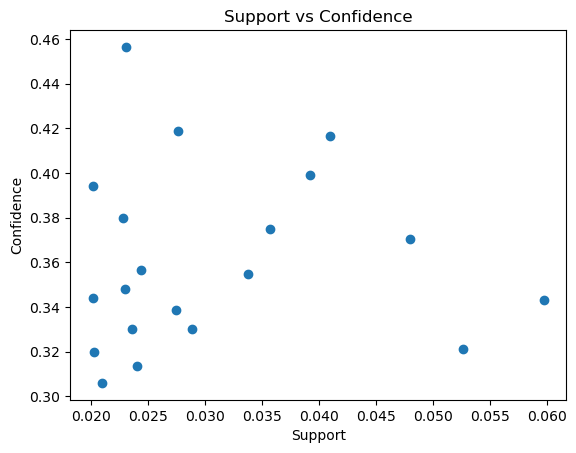

In [58]:
# Plotting support vs confidence for rules
plt.scatter(rules['support'], rules['confidence'], alpha=1.0)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

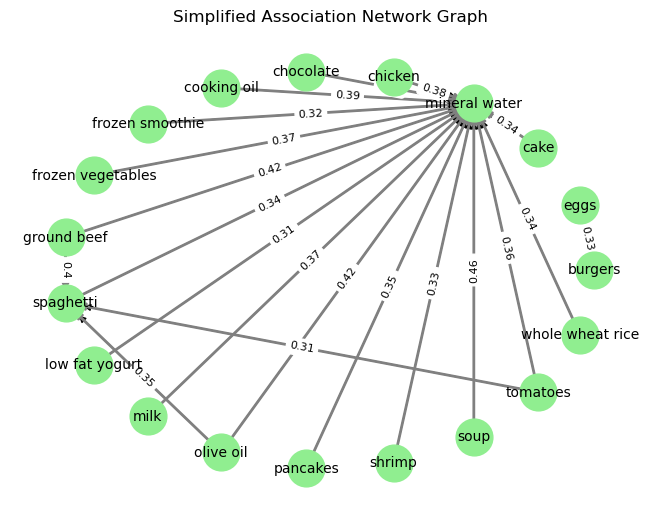

In [60]:
# Initialize a directed graph
G = nx.DiGraph()

# Add edges to the graph based on association rules
for _, rule in rules.iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    G.add_edge(antecedents, consequents, weight=rule['confidence'])

# Define a simplified layout for the graph
pos = nx.circular_layout(G)  # Simpler layout for better understanding

# Draw the nodes with simplified labels and uniform size/color
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightgreen', font_size=10, arrows=True)

# Draw edges with a simple, uniform thickness based on confidence
nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=2, edge_color='gray')

# Add labels to edges (confidence, rounded to 2 decimal places)
edge_labels = {(ante, cons): f"{round(data['weight'], 2)}" for (ante, cons, data) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Display the graph
plt.title("Simplified Association Network Graph")
plt.show()